<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>


## Assignment 2
### Applied Machine Learning

__1. [20 pts] At a high-level, without entering into mathematical details, compare and contrast
the following classifiers:__

Some comparison criterion can be:
* **Does the method solve an optimization problem, if yes what is the cost function?**
* **Speed? Strength? Robustness?**
* **Feature type that the classifier naturally uses (e.g. based on the comparison measure, such as entropy or distance)**
* **Which one will be the first that you would try on your dataset?**

The Perceptron version from our textbook takes a set of examples $\in X = \{X_1, X_2, ... X_n\}$ with $m$ features and while initializing with set of $m+1$ small weights, computes prediction for each example $\in X$ and updates the weights according learning rule.  It is a linear binary classifier.  If the prediction is correct then the weights are not changed and if the prediction is wrong then the weights are "push toward the direction"$^\underline{1}$ of the correct target class.  It is not an optimization problem as we classify a predicted target according to a threshold function so there is no cost function.  The feature type that this example of the Perceptron from our text uses is not a distance measure but a measure according to a numerical step function.  If the net input (the dot product of example features with the weights) is above a threshold then we set to that respective classification and if it is below we set to the other binary classification.  A downfall of the Perceptron is that if the binary classification data is not linearly separable by a hyperplane then the algorithm will never converge and will continue to update the weights until a parameter is defined to stop fitting the data.  Therefore if my data set had the target classification information (i.e. supervised model) and the binary classification was not linearly separable I would not use this classifier.  

Support Vector Machines were meant to handle the problem of non-linearity and are an extension of the Perceptron algorithm. SVMs also differ from the Perceptron is that they do solve an optimization function by trying to maximize the margin or the distance between the hyperplanes separating the classes and examples closest to the hyperplanes.  The cost function that we wish to maximize is the distance between the support vectors, and so the feature type naturally used by this classifier is distance.  The cost function for the normalized distance between the hyperplanes is:

<p style="text-align: center;"> $\frac{\textbf{w}^T(x_+ - x_-)}{||w||} = \frac{2}{||w||}$</p>

According to our textbook is indicates it is actually to minimize the reciprocal of the equation on the right and also that minimizing $\frac{||w||}{2}$ is the same as minimizing $||w||^2$ because this is just a scalar of $2||w||$.  In its goal in maximizing the margin is to decrease generalization error on unseen data by reducing overfitting.  As the separation of classifications is done by vectors or hyperplanes they generally have low variance and high bias.  We can control the generalization error by choosing a hyperparameter, C, as a multiplier to slack variable for non-linear constraint (as previously mentioned to improve on the Perceptron) and in choosing a lower value for C in the cost function we can increase the bias and lower the variance and therefore control the level of robustness, or the ability to handle error in the data.  If my data looked like it could be separated by parallel support vectors based on certain graphs of the features in 2 and 3 dimensions (like the iris dataset on page 112 of our text) I would likely use SVM as the first on my dataset.  However it may be that non parallel separation may be better and I would also do a check of SVM vs. LogisticRegression.

The Decision Tree classifier from Scikit Learn learns through a series of questions in which there 2 answers and so is a binary tree to where the goal is to obtain a pure leaf nodes for which every example at the node belong to the same classification.  The internal nodes starting with the root node ask a question based on features of the dataset; either categorical or numerical.  Decision trees are not robust.  They tend to overfit the data with high variance and either input error or change to the input data will result in larger changes in the tree.  There is an optimization part in which we try to find the most optimal tree, i.e. the smallest tree depth separate all examples into their respective target categories by maximizing the information gain (IG) at each internal node but this problem is NP-complete.

The Random Forest classifier tries to alleviate the overfitting problem of Decision Tree and decision tree random forest combines an aggregate (also called ensemble in machine learning) of decision trees.  Because decision trees have high variance and low bias due to overfitting with deep decision trees, the Random Forest classifier takes an average of many decision trees in order to increase the generalization and robustness.  Obviously because it used multiple decision trees to create the forest, it will be slower than a single Decision Tree classifier.  Both Decision Tree and Random Forest classifiers use an entropy feature type at the internal nodes to trying to maximize division (or disorder) examples into their respective classification.  Higher information gain and higher separation of examples leads to the "entropic" metaphor with respect to the mathematical and physics definition of entropy.

Resources:
1. Raschka, S., Mirjalili, V. (2019) Python Machine Learning _Third Edition_. Birmingham B3 2PB, UK: Packt Publishing.

__2. [20 pts] Using real datasets (can also be hypothetically constructed by yourself) define the following feature types and give example values from your dataset. How would you represent these features in a computer program? (e.g. 32-bit integer? Floating point? String?):__

I will use a hypothetical dataset for leukemia in children.
* **Numerical**
<br>An example of a numerical data feature for this dataset would be "White Blood Cell Count" or WBC count.  These measurements are typically done on a per $\mu$L basis and since the normal range is 5,000-10,000 and maybe higher for children with leukemia so say we double that to 20,000 then only a 16-bit integer would suffice.
<p></p>
* **Nominal**
<br>And example of nominal feature for this dataset would be status of patient: whether the child currently "has leukemia", is in "remission", is "recurrent", or is "refractory".  I would represent this as a string data structure.
<p></p>
* **Date**
<br>An example of a date feature would be the last treatment date of the patient.  I would just represent the date exactly how Python does it in ISO 8601 format YYYY-MM-DD and this would be a string.
<p></p>
* **Text**
<br>An example of text data feature would be notes for a patient.  I would represent this data feature as an array of strings.
<p></p>
* **Image**
<br>An example would be an image of blood smear from a patient under a microscope.  I would represent this colored image as a 3 dimensional $n$ x $m$ x $3$ matrix where each pixel is an entry in the matrix in the range $n$ x $m$ and the third dimension would be three channels for RGB.  So the final dimensions including the number of examples $N$ would be $N$ x $n$ x $m$ x $3$.
<p></p>
* **Dependent variable**
<br>The dependent variable for a leukemia dataset would be the type of leukemia that has or had.  This is a dependent variable from the leukemia dataset in R.  The classes could be "B-cell ALL", "AML", "T-cell ALL", and "CML".  This would also be represented as a string.

__3. [20 pts] Using online resources, research and find other classifier performance metrics which are also as common as the accuracy metric. Write down the mathematical equations and the meaning of the metrics that you found.__

Logarithmic Loss is another metric and the equation is: $$LL = \frac{-1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}y_{ij}*log(p_{ij})$$
Log loss basically takes the negative sum of all log probabilities given to testing data with respect to the actual classification values.  The $y_{ij}$ will only be a 1 for the actual classification and 0 otherwise.  Then it takes the average over the $N$ number of samples in the test dataset.  It measures how accurate the classifier is like accuracy but in additional it measures accurate was the accuracy, i.e. a Log Loss of 0 means that for each example the classifier was 100% sure of the classification for each example.  See code example below for Log Loss using sklearn and manual log loss calculation by me :).

Area Under Curve is another measurement.  There are two measurements made and the graphed against each other:

$$True Positive Rate = \frac{True Positives}{True Positives + False Negatives}$$

$$False Positive Rate = \frac{False Positives}{False Positives + True Negatives}$$

It measure the area under the curve graphing True Positives Rate on the y-axis and False Rate on the x-axis.  Although a high value for AUC is good, the steeper the curve means we have higher True Positive Rates than False Positive Rates at certain thresholds, which is what we want.  Taking the chart below and an example from Iris dataset for the first classification of 'setosa'.  True positives are model classification of 'setosa' and ground truth is 'setosa' while false negatives are model classification 'not setosa' and ground truth is 'setosa'.  Therefore a higher True Positive Rate means we have more true positives that false negatives which is what we want.  True Positive Rate measures the sensitivity of the model and it's ability to predict a 'setosa' is a 'setosa'.    False positives are model classification of 'setosa' but ground truth is 'not setosa' and true negatives are model classification 'not setosa' and ground truth is 'not setosa'.  Therefore lower False Positive Rate is better because we want more True negatives.  In statistics we actually call this the True Negative Rate and True Negatives are in the numerator instead of False positives (higher value is also better).  This measures the specificity of the model and it's ability to correctly classify examples not in a classification as not in that classification.

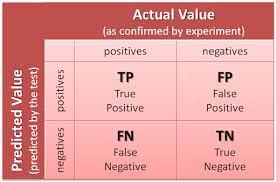
<div style="text-align: center"> *From https://medium.com/@awabmohammedomer/confusion-matrix-b504b8f8e1d1 </div>
 
F1 Score is sort of similar to Area Under Curve in that is uses the same numbers for it's calculations: True Positive, False Negative, False Positive, and True Negative but the calculations are different.  The F1 score is actually a calculation of two other performance metrics: Precision and Recall.  Precision deals with how accurate or exact the classifier was.  It measures out of all the classifications predicted by our model classifier of a particular target (all the positives true and false), how many were actually true (true positives in numerator).  In statistics this is also called the Positive Predictive Value (PPV) and is calculated as:

$$Precision (or PPV) = \frac{True Positives}{True Positives + False Positives}$$

Recall is actual the same calculation of the True Positive Rate above for Area Under Curve (the y_axis).  In short it measures for all the ground truths of a particular target (the actuals)  how many did our model correctly classify as that target (model positives).  I do like how one resource indicated this as a measure of completeness because it does measure how completely the model was able to predict a particular classification.  If for example there were 50 'setosa' flowers and out these 50 (not 50 in general but these specific 50 setosas) our model classified 49 to be setosa than that is very complete classification with respect to setosas.  Now the F1 scores, as mentioned above calculates a ratio of Precision to Recall.  It measures the balance between the two along with accuracy.  It is calculated as:
$$F_1 = 2*\frac{Precision*Recall}{Precision+Recall}$$

Since the highest Precision or Recall can be is 100% the highest F1 can be is 1.  Where we have $2*\frac{1*1}{1+1}=1$ and the lowest F1 can be is 0 if both Precision and Recall are both 0 and we classify every target incorrectly.

In [5]:
## test the mathematical function for Logarithmic Loss
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_test, X_train, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

lr = LogisticRegression()
y_pred_probs = lr.fit(X_train, y_train).predict_proba(X_test)

## print sklearn log loss builtin function
print("Sklearn's built-in log_loss =", round(log_loss(y_test, y_pred_probs),6))

## print mathematical function for log loss from internet
## really only required for each ground truth to log that column of probs for that specific example
## and multiply by 1 because for this dataset an example can only have 1 y_ij classification
## the other y_ij are 0 for each example
print("Mathematical function of log_loss =",
      round(-sum(np.log(y_pred_probs[np.arange(len(y_pred_probs)), y_test]))/len(y_test),6))


Sklearn's built-in log_loss = 1.112993
Mathematical function of log_loss = 1.112993


__4. [40 pts] Implement a correlation program to look at the correlations between the features of
Admission_Predict.csv dataset file (not provided, you have to download it by yourself by
following the instructions in the module Jupyter notebook). Display the correlation matrix
where each row and column are the features, which should be an 8 by 8 matrix (should we
use 'Serial no'?).__

__Observe that the diagonal of this matrix should have all 1's and explain why? Since the last
column can be used as the target (dependent) variable, what do you think about the
correlations between all the variables? Which variable should be the most important for
prediction of 'Chance of Admit'?__

The diagonals of the correlation matrix all have one because this is where the variable correlation is being calculated against itself and so it will have 100% correlation or a slope of 1.  Looking at the correlations in the last column for the dependent variable, I noticed that are all above 50% so we have some great features picked out to help our classifier predict 'Chance of Admit'.  The variable with the highest correlation to the dependent variable and therefore important for prediction of 'Chance of Admit' is 'CGPA' with an extremely high correlation of 87.33%.

In [2]:
import pandas as pd
import numpy as np

## Import dataset from home directory
df = pd.read_csv('datasets/Admission_Predict.csv')
print('N rows={}, M columns={}'.format(len(df), len(df.columns)))
df.head()

N rows=400, M columns=9


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The equation for the Pearson correlation coefficient for two variables $\textbf{x}$ and $\textbf{y}$ is:

$$r_{xy} = \frac{\sum_{i=1}^{N}(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^{N}(x_i-\overline{x})^2}\sqrt{\sum_{i=1}^{N}(y_i-\overline{y})^2}}$$

The method below will iterate over each each feature including the target and calculate the correlation with every other feature including itself.

In [3]:
# removing serial number as not a valid feature
df_no_serial = df.iloc[:,1:]

# rename target column correctly
df_no_serial.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

def correlation(data):
    matrix = np.zeros(shape=(len(data.columns),
                             len(data.columns)))
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            corr = round(
                    (sum((data.iloc[:,i]-data.iloc[:,i].mean())*(data.iloc[:,j]-data.iloc[:,j].mean())) /
                    (np.sqrt(sum((data.iloc[:,i]-data.iloc[:,i].mean())**2))*np.sqrt(sum((data.iloc[:,j]-data.iloc[:,j].mean())**2)))
                   ), 6)
            matrix[i,j] = corr
    return pd.DataFrame(matrix, columns=data.columns, index=data.columns)

In [4]:
## print correlation matrix using my function
corr_mat = correlation(df_no_serial)
print(corr_mat)

## test to make sure my correlation function matches df.corr() built-in for pandas
print('\nDo correlations match pandas built-in?\n', 
      all(round(correlation(df_no_serial),6)==round(df_no_serial.corr(),6)), sep='')

## print which dependent variable has the highest correlation with target 'Chance of Admit'
## note [df].idxmax() gives the row name for max value while [df].max() gives max value
print("\nThe variable with highest correlation to 'Chance of Admit' is ", 
      corr_mat.loc[corr_mat['Chance of Admit'] < 1]['Chance of Admit'].idxmax(),
      'with correlation of', corr_mat.loc[corr_mat['Chance of Admit'] < 1]['Chance of Admit'].max())

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit  
GRE Score          0.557555  0.833060  0.580391         0.802610  
TOEFL Score        0.567721  0.828417  0.489858         0.791594  
University Rating  0.660123  0.746479  0.447783         0.711250  
SOP                0.729593  0.718144  0.444029         0.675732 